In [44]:
import pandas as pd
import tempfile
from io import StringIO
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)


In [45]:
def importdf(filename):
    with open(filename, 'r') as fin:
        data = fin.read().splitlines(True)

        data = data[2:]
        data = data[:-2]

        tf = tempfile.NamedTemporaryFile(mode='w')
        tf.writelines(data)
        tf.seek(0)
        df = pd.read_csv(tf.name)
        tf.close()
        return(df)
        #df = pd.read_csv

In [46]:
df1 = importdf('lindarollover.csv')
df2 = importdf('main.csv')
df3 = importdf('ericira.csv')
df = pd.concat([df1, df2, df3])

In [47]:
df=df[df["Expiration/Maturity"]!="--"]

In [48]:
from datetime import datetime

df.loc[:,("maturity")] = pd.to_datetime(df["Expiration/Maturity"])
df.loc[:,("Quantity")] = df["Quantity"].str.replace(',','')
df=df[["maturity","Quantity"]]


In [49]:
#df=df.set_index(['maturity'])
#print(df5['maturity'].min())
#print(df5['maturity'].max())

#print(df5.index)
#print(d.index)
#d2 = d.asfreq(freq='90D',fill_value=42)
#display(d)
#display(d2)

idx = pd.date_range(df["maturity"].min(),df["maturity"].max(),freq='90D')
df = df.set_index(["maturity"])

#display(idx)
#df = df.reindex(idx)
#df = df.asfreq('d',fill_value=0)
#display(d3)
#df6['id'] = range(1,1+len(df6))
#df6.insert(0,'id',range(1,1 + len(df6)))
#df6=df6.set_index('id')
##display(df6)
#df.reset_index(inplace=True)
#df.set_index('maturity', drop=False)

In [50]:
df.loc[:,("maturityq")] = pd.PeriodIndex(df.index, freq='Q')
df=df.sort_values(by=["maturity"],ascending=True)
##display(df)
df.loc[:,("Quantityi")] = df["Quantity"].astype(int)
df = df[["maturityq","Quantityi"]]
df
results = df.groupby(by=['maturityq']).sum()
display(results)

,Quantityi
maturityq,
2023Q4,80000
2024Q1,651000
2024Q2,426000
2024Q3,641000
2024Q4,186000
2025Q1,695000
2025Q2,141000
2025Q3,346000
2025Q4,24000


In [51]:
type(df["Quantityi"])
display(df["Quantityi"])

maturity
2023-11-21     6000
2023-11-30    24000
2023-12-28    33000
2023-12-31    17000
2024-01-11    26000
              ...  
2027-11-22    22000
2028-03-31    50000
2029-01-23     5000
2033-03-15     4000
2041-03-01     3000
Name: Quantityi, Length: 73, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.close("all")
np.random.seed(123456)

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
display(type(ts))
display(ts)

ts = ts.cumsum()

ts.plot();

DONE


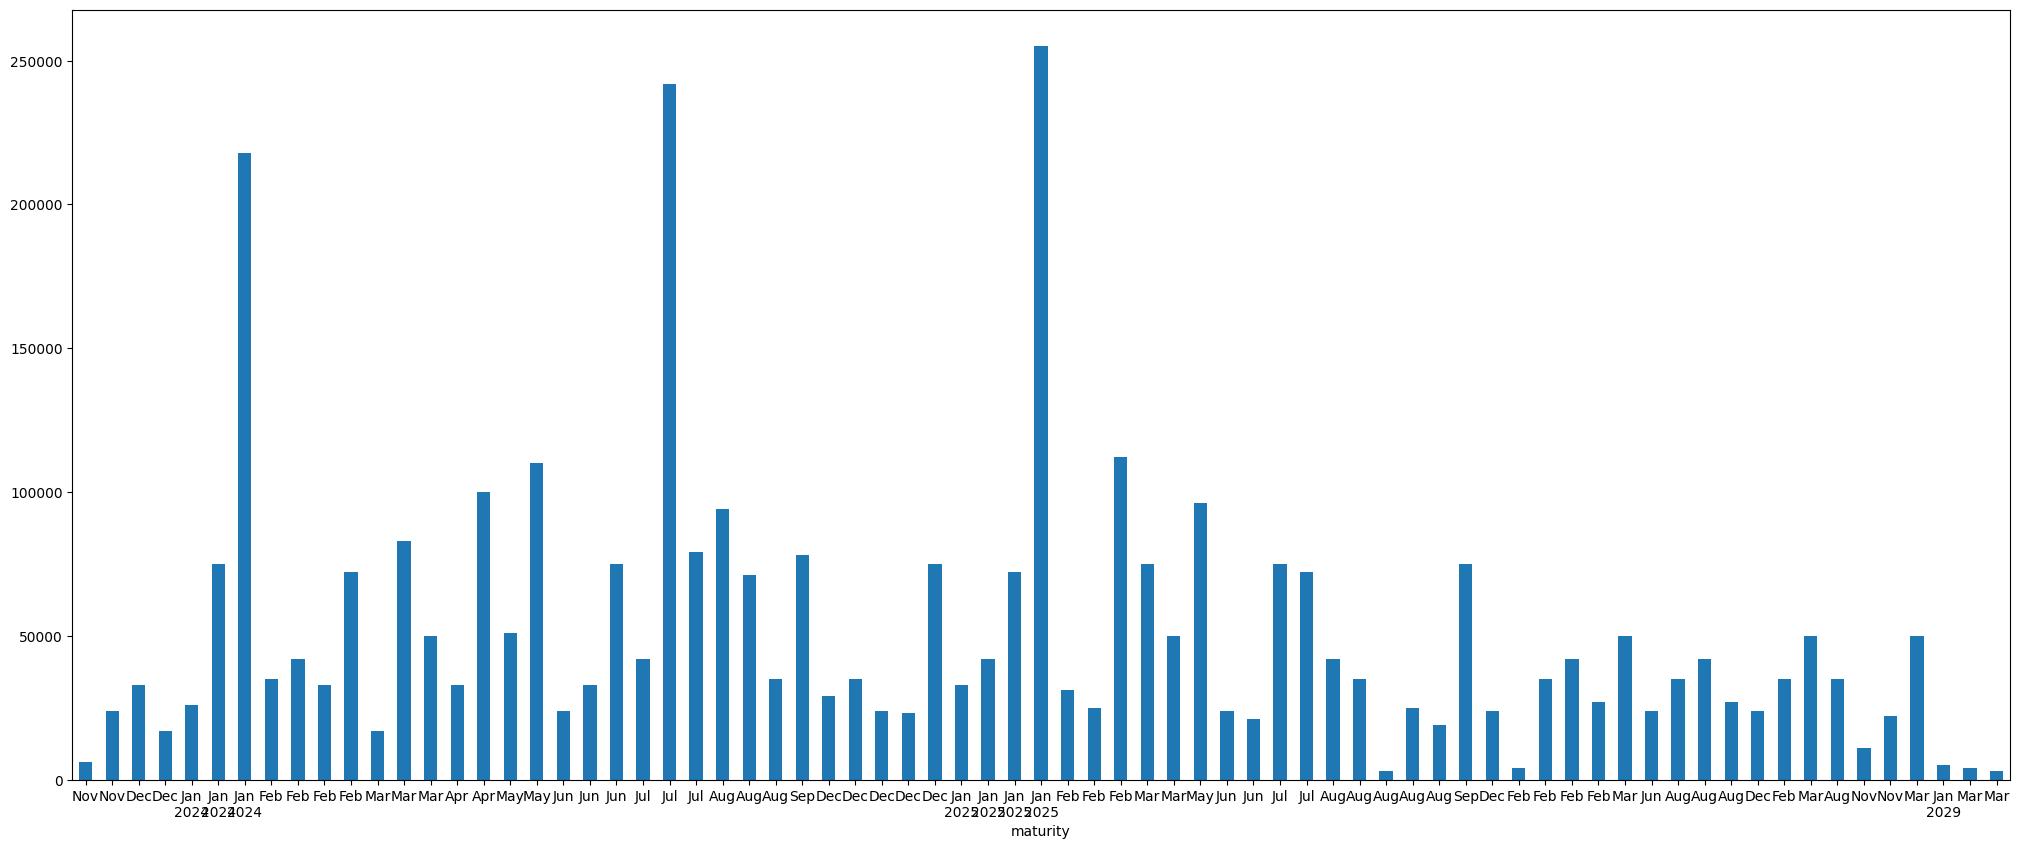

In [62]:
import matplotlib.pyplot as plt
import numpy as np

def line_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    month = label.month_name()[:3]
    if month == 'Jan':
        month += f'\n{label.year}'
    return month

plt.close("all")
ts = df["Quantityi"]
ax = ts.plot(kind='bar',figsize=(25,10),rot=0);
ax.set_xticklabels(map(line_format, ts.index))
print("DONE")

In [53]:
df.index.month

Index([11, 11, 12, 12,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  5,  5,
        6,  6,  6,  7,  7,  7,  8,  8,  8,  9, 12, 12, 12, 12, 12,  1,  1,  1,
        1,  2,  2,  2,  3,  3,  5,  6,  6,  7,  7,  8,  8,  8,  8,  8,  9, 12,
        2,  2,  2,  2,  3,  6,  8,  8,  8, 12,  2,  3,  8, 11, 11,  3,  1,  3,
        3],
      dtype='int32', name='maturity')